In [1]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import os
import re
import gzip
import shutil
import glob
import numpy as np
import scipy.stats as stats
import pylab as pl


In [ ]:
df = pd.read_csv('MS_df.csv')
df.fillna('', inplace=True)


In [4]:
def dssp_file_df(file):
    p = PDBParser()
    structure = p.get_structure(f"{file}", file)
    model = structure[0]
    dssp = DSSP(model, file)
    df= pd.DataFrame(dssp)
    df.columns = ["dssp index", "amino acid", "secondary structure", "relative ASA", "phi", "psi", "NH01R", "NH01E", "ONH1", "ONHE", "NH2R",
    "NO2E", "ONH2R", "ONH2E"]
    return df

In [ ]:
df

In [ ]:
relative_asa = []
secondary_structure = []
phi = []
psi = []
NH01R = []
NH01E = []
ONH1 = []
ONHE = []
NH2R = []
NO2E = []
ONH2R = []
ONH2E = []



for i,j in df.iterrows():
    filename= f'AF-{j["ProteinID"]}-F1-model_v2.pdb' 
    if filename in os.listdir('human_proteome/'):
        print(filename)

        df_dssp= dssp_file_df(f'human_proteome/{filename}')
        if j['LastAA_position'] in df_dssp['dssp index']:
            relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0])
            secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0])
            phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0])
            psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0])
            NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0])
            NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0])
            ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])
            ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])
            NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])
            NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])
            ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0])
            ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0])


        else:
            relative_asa.append('')
            secondary_structure.append('')
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')
    else:
        relative_asa.append('')
        secondary_structure.append('')  
        phi.append('')
        psi.append('')
        NH01R.append('')
        NH01E.append('')
        ONH1.append('')
        ONHE.append('')
        NH2R.append('')
        NO2E.append('')
        ONH2R.append('')
        ONH2E.append('')

In [19]:
df['secondary_structure'] = secondary_structure
df['relative ASA'] = relative_asa
df['phi'] = phi
df['psi'] = psi
df['NH01R'] = NH01R
df['NH01E'] = NH01E
df['ONH1'] = ONH1
df['ONHE'] = ONHE
df['NH2R'] = NH2R
df['NO2E'] = NO2E
df['ONH2R'] = ONH2R
df['ONH2E'] = ONH2E
df.to_csv('df_dssp.csv', index=False)

In [20]:
df['relative ASA'].replace('', np.nan, inplace=True)
df.dropna(subset=['relative ASA'], inplace=True)


In [37]:
ss= pd.get_dummies(df.secondary_structure)
df= pd.concat([df, ss], axis=1)

In [38]:
mod= pd.get_dummies(df.Modifications)
df= pd.concat([df, mod], axis=1)

In [88]:
df.to_csv('df_dssp_new.csv', index=False)

In [89]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,-,...,0,0,0,0,0,0,0,0,0,1
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,-,...,0,0,0,0,0,1,0,0,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,0,0,0,0,0,1,0,0,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,-,...,0,0,0,0,0,1,0,0,0,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,H,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,H,...,0,0,0,0,0,0,0,0,0,1
42226,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,H,...,0,0,0,0,0,0,0,0,0,1
42227,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,H,...,0,0,0,0,0,0,0,0,0,1
42228,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,-,...,0,0,0,0,0,0,0,0,0,1


In [90]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage


,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,-,...,0,0,0,0,0,0,0,0,0,1
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,-,...,0,0,0,0,0,1,0,0,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,-,...,0,0,0,0,0,1,0,0,0,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,H,...,0,0,0,0,0,0,0,0,0,1
5,AAAAAAGAASGLPGPVAQGLK,Q96P70,Acetyl (Protein N-term),2,22,AAAAAAGAASGLPGPVAQGLK,K,22,0,H,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,H,...,0,0,0,0,0,0,0,0,0,1
42226,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,H,...,0,0,0,0,0,0,0,0,0,1
42227,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,H,...,0,0,0,0,0,0,0,0,0,1
42228,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,-,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,0,0,0,0,0,1,0,0,0,0
12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,H,...,0,0,0,0,0,1,0,0,0,0
67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,-,...,0,0,0,0,0,0,0,0,0,1
113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,-,...,0,0,0,0,0,0,0,0,0,1
117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,H,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41970,YSDDLLKK,Q5T6V5,Unmodified,254,261,YSDDLLK,K,260,1,H,...,0,0,0,0,0,0,0,0,0,1
42002,YSHVNKK,Q9UQE7,Unmodified,979,985,YSHVNK,K,984,1,T,...,0,0,1,0,0,0,0,0,0,1
42109,YVDEASKK,P62249,Unmodified,99,106,YVDEASK,K,105,1,H,...,0,0,0,0,0,0,0,0,0,1
42132,YVGKEPSGLR,O94925,Unmodified,308,317,YVGK,K,311,1,S,...,0,1,0,0,0,0,0,0,0,1


In [92]:
df_cleavage = df_cleavage[df_cleavage['relative ASA'] != '']
df_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,-,...,0,0,0,0,0,0,0,0,0,1
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,-,...,0,0,0,0,0,1,0,0,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,-,...,0,0,0,0,0,1,0,0,0,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,H,...,0,0,0,0,0,0,0,0,0,1
5,AAAAAAGAASGLPGPVAQGLK,Q96P70,Acetyl (Protein N-term),2,22,AAAAAAGAASGLPGPVAQGLK,K,22,0,H,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,H,...,0,0,0,0,0,0,0,0,0,1
42226,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,H,...,0,0,0,0,0,0,0,0,0,1
42227,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,H,...,0,0,0,0,0,0,0,0,0,1
42228,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,-,...,0,0,0,0,0,0,0,0,0,1


In [93]:
df_miss_cleavage = df_miss_cleavage[df_miss_cleavage['relative ASA'] != '']
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,0,0,0,0,0,1,0,0,0,0
12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,H,...,0,0,0,0,0,1,0,0,0,0
67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,-,...,0,0,0,0,0,0,0,0,0,1
113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,-,...,0,0,0,0,0,0,0,0,0,1
117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,H,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41970,YSDDLLKK,Q5T6V5,Unmodified,254,261,YSDDLLK,K,260,1,H,...,0,0,0,0,0,0,0,0,0,1
42002,YSHVNKK,Q9UQE7,Unmodified,979,985,YSHVNK,K,984,1,T,...,0,0,1,0,0,0,0,0,0,1
42109,YVDEASKK,P62249,Unmodified,99,106,YVDEASK,K,105,1,H,...,0,0,0,0,0,0,0,0,0,1
42132,YVGKEPSGLR,O94925,Unmodified,308,317,YVGK,K,311,1,S,...,0,1,0,0,0,0,0,0,0,1


In [94]:
Cleavage= []
for i in df_cleavage['relative ASA']:
    Cleavage.append(i)


h= sorted(Cleavage)

In [95]:
Miss_cleavage= []
for j in df_miss_cleavage['relative ASA']:
    Miss_cleavage.append(j)


k= sorted(Miss_cleavage)

In [96]:
print(len(Cleavage))
print(len(Miss_cleavage))

37820
4410


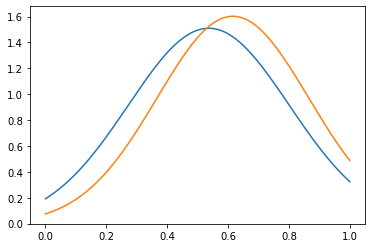

In [97]:
hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [98]:
df['Last_AA'].value_counts()

K    27504
R    14712
F        4
L        2
H        2
Q        2
N        1
M        1
V        1
A        1
Name: Last_AA, dtype: int64

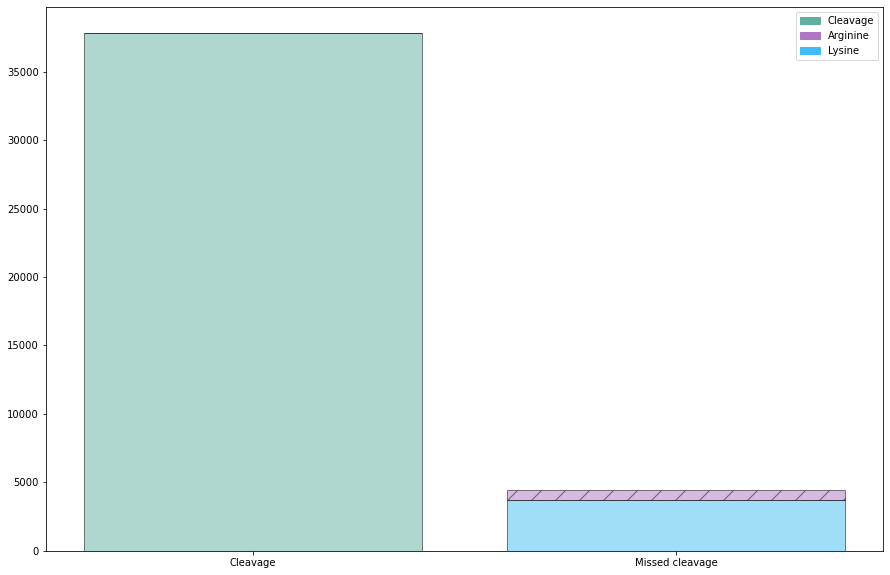

In [99]:
import matplotlib.patches as mpatches

x= ['Cleavage', 'Missed cleavage']
y= [len(Cleavage), 3685]
y1= [1, 725]
plt.figure(figsize=(15, 10))
plt.bar(x, y, color=["#61afa1",'#42bcf5'], width=0.8, alpha=0.5, edgecolor='black', linewidth=1)
plt.bar(x, y1, color= "#b175c7", width=0.8, alpha=0.5, bottom=y, hatch='/', edgecolor='black', linewidth=1)

Cleavage1 = mpatches.Patch(color='#61afa1', label='Cleavage')
Lysine = mpatches.Patch(color='#b175c7', label='Arginine')
Arginine = mpatches.Patch(color='#42bcf5', label='Lysine')


plt.legend(handles= [Cleavage1, Lysine, Arginine])
plt.show()

In [100]:
df_miss_cleavage['Last_AA'].value_counts()

K    3685
R     725
Name: Last_AA, dtype: int64

In [101]:
from scipy.stats import ttest_ind

df1 = df[df['relative ASA'] != '']



cat1 = df1[df1['Cleavage']==0]
cat2 = df1[df1['Cleavage']==1]

ttest_ind(Cleavage, Miss_cleavage)

Ttest_indResult(statistic=-18.972008194375736, pvalue=6.256665134107635e-80)

In [102]:
print(len(Cleavage))
print(len(Miss_cleavage))

37820
4410


In [111]:
df = pd.read_csv('df_dssp_new.csv')

In [112]:
df

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth
0,0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,...,0,0,0,0,0,0,0,1,1.870620,1.999511
1,1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,...,0,0,0,1,0,0,0,0,1.806878,1.999812
2,2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,1,0,0,0,0,1.806878,1.999812
3,3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,...,0,0,0,1,0,0,0,0,1.916649,1.999362
4,4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,...,0,0,0,0,0,0,0,1,1.903494,1.999405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,42225,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,...,0,0,0,0,0,0,0,1,1.890864,1.999755
42226,42226,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,...,0,0,0,0,0,0,0,1,1.977119,1.999524
42227,42227,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,...,0,0,0,0,0,0,0,1,1.920681,1.999527
42228,42228,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,...,0,0,0,0,0,0,0,1,3.268642,3.966887


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [114]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth'],
      dtype='object')


In [6]:
#df= df.drop(['-', 'B', 'E', 'G',
#       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
#       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
#       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
#       '-', 'B', 'E', 'G', 'H', 'I', 'S', 'T', '2 Oxidation (M)',
#       '3 Oxidation (M)', 'Acetyl (Protein N-term)',
#       'Acetyl (Protein N-term),2 Oxidation (M)',
#       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified'], axis=1)

In [115]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

4410

In [116]:
df_cleavage= df.loc[df['Cleavage'] == 0]
len(df_cleavage)

37820

In [118]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=4410)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [10]:
df_test.to_csv('df_test.csv', index=False)

In [119]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth
2,2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,1,0,0,0,0,1.806878,1.999812
12,12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,...,0,0,0,1,0,0,0,0,2.055327,2.397385
67,67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,...,0,0,0,0,0,0,0,1,1.870708,1.999621
113,113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,...,0,0,0,0,0,0,0,1,1.896769,1.999295
117,117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,...,0,0,0,1,0,0,0,0,2.229631,2.893575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36178,36178,TLLENTAITIGR,Q92973,Unmodified,774,785,TLLENTAITIGR,R,785,0,...,0,0,0,0,0,0,0,1,4.021615,5.610106
38966,38966,VLEQLEDLDSR,P26358,Unmodified,910,920,VLEQLEDLDSR,R,920,0,...,0,0,0,0,0,0,0,1,2.412406,2.855466
28416,28416,NLIDEDGNNQWPEGLK,O00410,Unmodified,119,134,NLIDEDGNNQWPEGLK,K,134,0,...,0,0,0,0,0,0,0,1,1.976037,1.999330
14466,14466,GQLEANLLQVLEK,Q6KB66,Unmodified,151,163,GQLEANLLQVLEK,K,163,0,...,0,0,0,0,0,0,0,1,2.111816,1.999743


In [120]:
df_test['Cleavage'].value_counts()

0    4410
1    4410
Name: Cleavage, dtype: int64

In [121]:
x = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified', 'res_depth', 'ca_depth']]
       
y = df_test['Cleavage']


In [122]:
len(df_test['Cleavage'])

8820

In [123]:
from sklearn.tree import plot_tree

In [124]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [139]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy:  0.6095238095238096


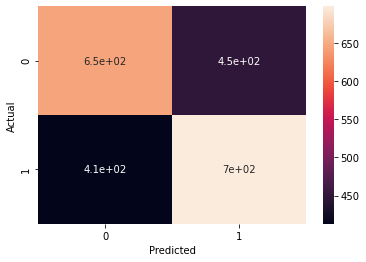

In [140]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [130]:
coloumn_names= ['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified', 'res_depth', 'ca_depth']

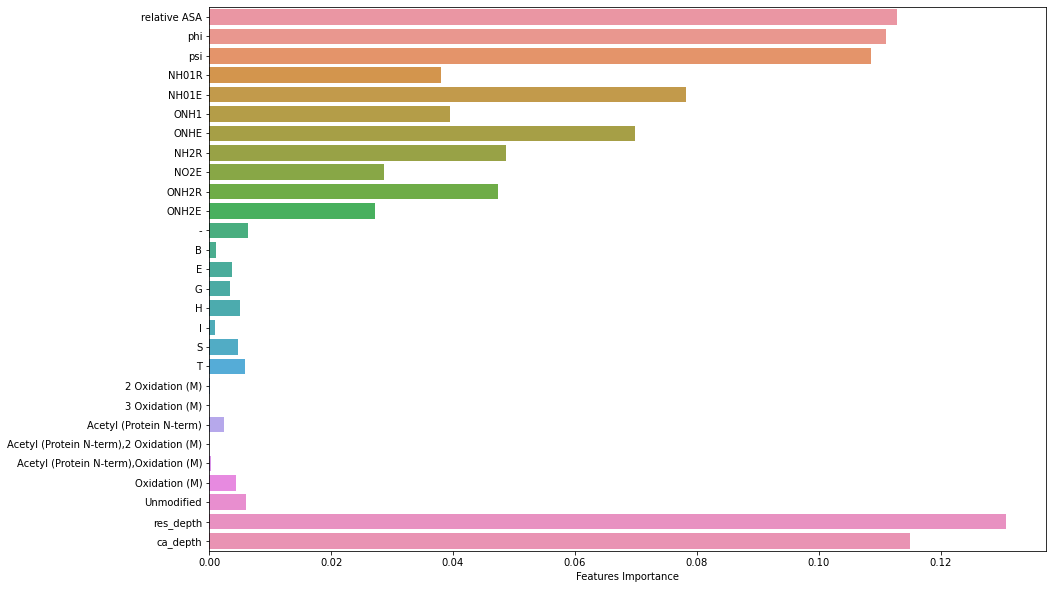

In [131]:
featureImportances = pd.Series(clf.feature_importances_)
plt.figure(figsize=(15, 10))
plt.xlabel('Features Importance')
sn.barplot(x=featureImportances, y=coloumn_names)
plt.show()



In [76]:
df_cleav= df_test.loc[df['Cleavage'] == 0]
df_cleav

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
22781,LELLLMDNLR,P26006,Unmodified,553,562,LELLLMDNLR,R,562,0,-,...,0,0,0,0,0,0,0,0,0,1
15050,GVTSILPVLR,Q92616,Unmodified,2260,2269,GVTSILPVLR,R,2269,0,H,...,0,0,0,0,0,0,0,0,0,1
29828,QDLPDAMKPHEIQEK,P62330,Unmodified,124,138,QDLPDAMKPHEIQEK,K,138,0,H,...,0,0,0,0,0,0,0,0,0,1
38722,VITIMQNPR,P62269,Oxidation (M),67,75,VITIMQNPR,R,75,0,T,...,0,0,1,0,0,0,0,0,1,0
15535,HLPDNECIEK,P54136,Unmodified,144,153,HLPDNECIEK,K,153,0,E,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12306,FTPLPEGK,O75844,Unmodified,226,233,FTPLPEGK,K,233,0,H,...,0,0,0,0,0,0,0,0,0,1
14248,GNVLLEDGK,Q9NPR2,Unmodified,174,182,GNVLLEDGK,K,182,0,T,...,0,0,1,0,0,0,0,0,0,1
26887,METCPLDDDVK,P46939,Unmodified,444,454,METCPLDDDVK,K,454,0,H,...,0,0,0,0,0,0,0,0,0,1
24708,LNIHSIIK,Q6XZF7,Unmodified,992,999,LNIHSIIK,K,999,0,H,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df_mscleav= df_test.loc[df['Cleavage']== 1]
df_mscleav

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,I,S,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,0,0,0,0,0,1,0,0,0,0
12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,H,...,0,0,0,0,0,1,0,0,0,0
67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,-,...,0,0,0,0,0,0,0,0,0,1
113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,-,...,0,0,0,0,0,0,0,0,0,1
117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,H,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41970,YSDDLLKK,Q5T6V5,Unmodified,254,261,YSDDLLK,K,260,1,H,...,0,0,0,0,0,0,0,0,0,1
42002,YSHVNKK,Q9UQE7,Unmodified,979,985,YSHVNK,K,984,1,T,...,0,0,1,0,0,0,0,0,0,1
42109,YVDEASKK,P62249,Unmodified,99,106,YVDEASK,K,105,1,H,...,0,0,0,0,0,0,0,0,0,1
42132,YVGKEPSGLR,O94925,Unmodified,308,317,YVGK,K,311,1,S,...,0,1,0,0,0,0,0,0,0,1


In [82]:
cleav_rsa= []
mscleav= []

for i in df_cleav['relative ASA']:
    cleav_rsa.append(i)

for j in df_mscleav['relative ASA']:
    mscleav.append(j)

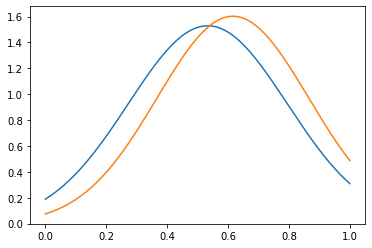

In [83]:
k= sorted(mscleav)
h= sorted(cleav_rsa)

hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [85]:
from scipy.stats import ttest_ind

ttest_ind(cleav_rsa, mscleav)


Ttest_indResult(statistic=-15.203663915731328, pvalue=1.501264443046758e-51)